In [65]:
import streamlit as st
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('synthetic_myntra_dataset.csv')

In [66]:
df.head()

,id,name,img,asin,price,mrp,rating,ratingTotal,discount,seller,purl,sales,reviews,popularity_score
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,532.0,1299.0,4.1,59,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...,166,"Poor quality, not as described. Would buy agai...",1
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,274.0,499.0,4.2,49,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,174,"Great product, highly recommend! Excellent val...",1
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,551.0,1199.0,4.5,28,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...,157,Would buy again! Excellent value for money. Fa...,1
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,296.0,1099.0,4.0,21,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...,180,"Decent quality, could be better. Poor quality,...",1
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",-,494.0,899.0,4.2,78,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,179,"Not satisfied with the product. Great product,...",1


In [67]:
df = df.drop('asin',axis=1)

In [68]:
df.head()

,id,name,img,price,mrp,rating,ratingTotal,discount,seller,purl,sales,reviews,popularity_score
0,1,Men Solid Oversized Cotton,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",532.0,1299.0,4.1,59,59,Difference of Opinion,https://www.myntra.com/tshirts/difference-of-o...,166,"Poor quality, not as described. Would buy agai...",1
1,2,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",274.0,499.0,4.2,49,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,174,"Great product, highly recommend! Excellent val...",1
2,3,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",551.0,1199.0,4.5,28,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...,157,Would buy again! Excellent value for money. Fa...,1
3,4,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",296.0,1099.0,4.0,21,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...,180,"Decent quality, could be better. Poor quality,...",1
4,5,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",494.0,899.0,4.2,78,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,179,"Not satisfied with the product. Great product,...",1


In [69]:
# ARIMA Sales Forecasting
sales_data = df['sales']
model = ARIMA(sales_data, order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

In [70]:
# Define trend-related keywords
trend_keywords = [
    "stylish", "fashion", "trendy", "modern", "elegant", "chic", "popular", 
    "comfortable", "durable", "affordable", "quality", "classic", "unique", 
    "beautiful", "cool", "awesome", "great", "nice", "good", "excellent"
]

# Function to extract trends from reviews
def extract_trends(reviews):
    trends = []
    if pd.isnull(reviews) or not reviews:
        return ["general"]  # Assign a default keyword if no review or keywords found
    reviews_lower = reviews.lower()
    for keyword in trend_keywords:
        if keyword in reviews_lower:
            trends.append(keyword)
    if not trends:
        trends.append("general")  # Assign a default keyword if no keywords are found
    return trends

In [72]:
df['trends'] = df['reviews'].apply(extract_trends)

In [73]:
df['trends']

0          [stylish, quality, great, excellent]
1          [stylish, quality, great, excellent]
2          [stylish, quality, great, excellent]
3          [stylish, quality, great, excellent]
4          [stylish, quality, great, excellent]
                           ...                 
1060208                        [quality, great]
1060209           [stylish, quality, excellent]
1060210                    [stylish, excellent]
1060211                    [quality, excellent]
1060212    [stylish, quality, great, excellent]
Name: trends, Length: 1060213, dtype: object

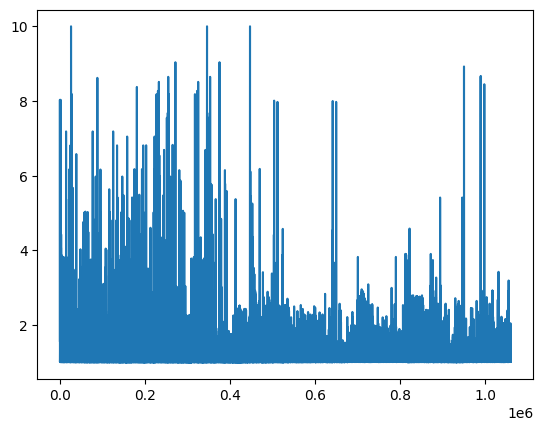

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['id'],df['popularity_score'])
plt.show()

In [ ]:

# Streamlit Dashboard
st.title('E-Commerce Dashboard')

# Display dataset
st.dataframe(df)

# Display popularity score distribution
st.subheader('Popularity Score Distribution')
st.bar_chart(df['popularity_score'])

# Display top products
st.subheader('Top Products')
top_products = df.sort_values(by='popularity_score', ascending=False).head(10)
st.table(top_products[['name', 'popularity_score']])

# Display sales forecast
st.subheader('Sales Forecast')
fig, ax = plt.subplots()
ax.plot(sales_data, label='Historical Sales')
ax.plot(range(len(sales_data), len(sales_data) + len(forecast)), forecast, label='Forecast')
ax.legend()
ax.set_title('Sales Forecast')
ax.set_xlabel('Time')
ax.set_ylabel('Sales')
st.pyplot(fig)

# Display trend predictions
st.subheader('Trend Predictions')
st.write(df['trends'])